<a href="https://colab.research.google.com/github/rakesh22230/Data-Mining-Lab/blob/main/Decission_Tree_SVM_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/rakesh22230/Data-Mining-Lab/refs/heads/main/titanic.csv")
print(df.shape)
print("Rows: ",df.shape[0])
print("Coumns: ",df.shape[1])
print("================================================================================================\n")
print(df.head(3))

(891, 12)
Rows:  891
Coumns:  12

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [2]:
print("\n")
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)



In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


Accuracy: 0.6681614349775785
Class names: ['0', '1']


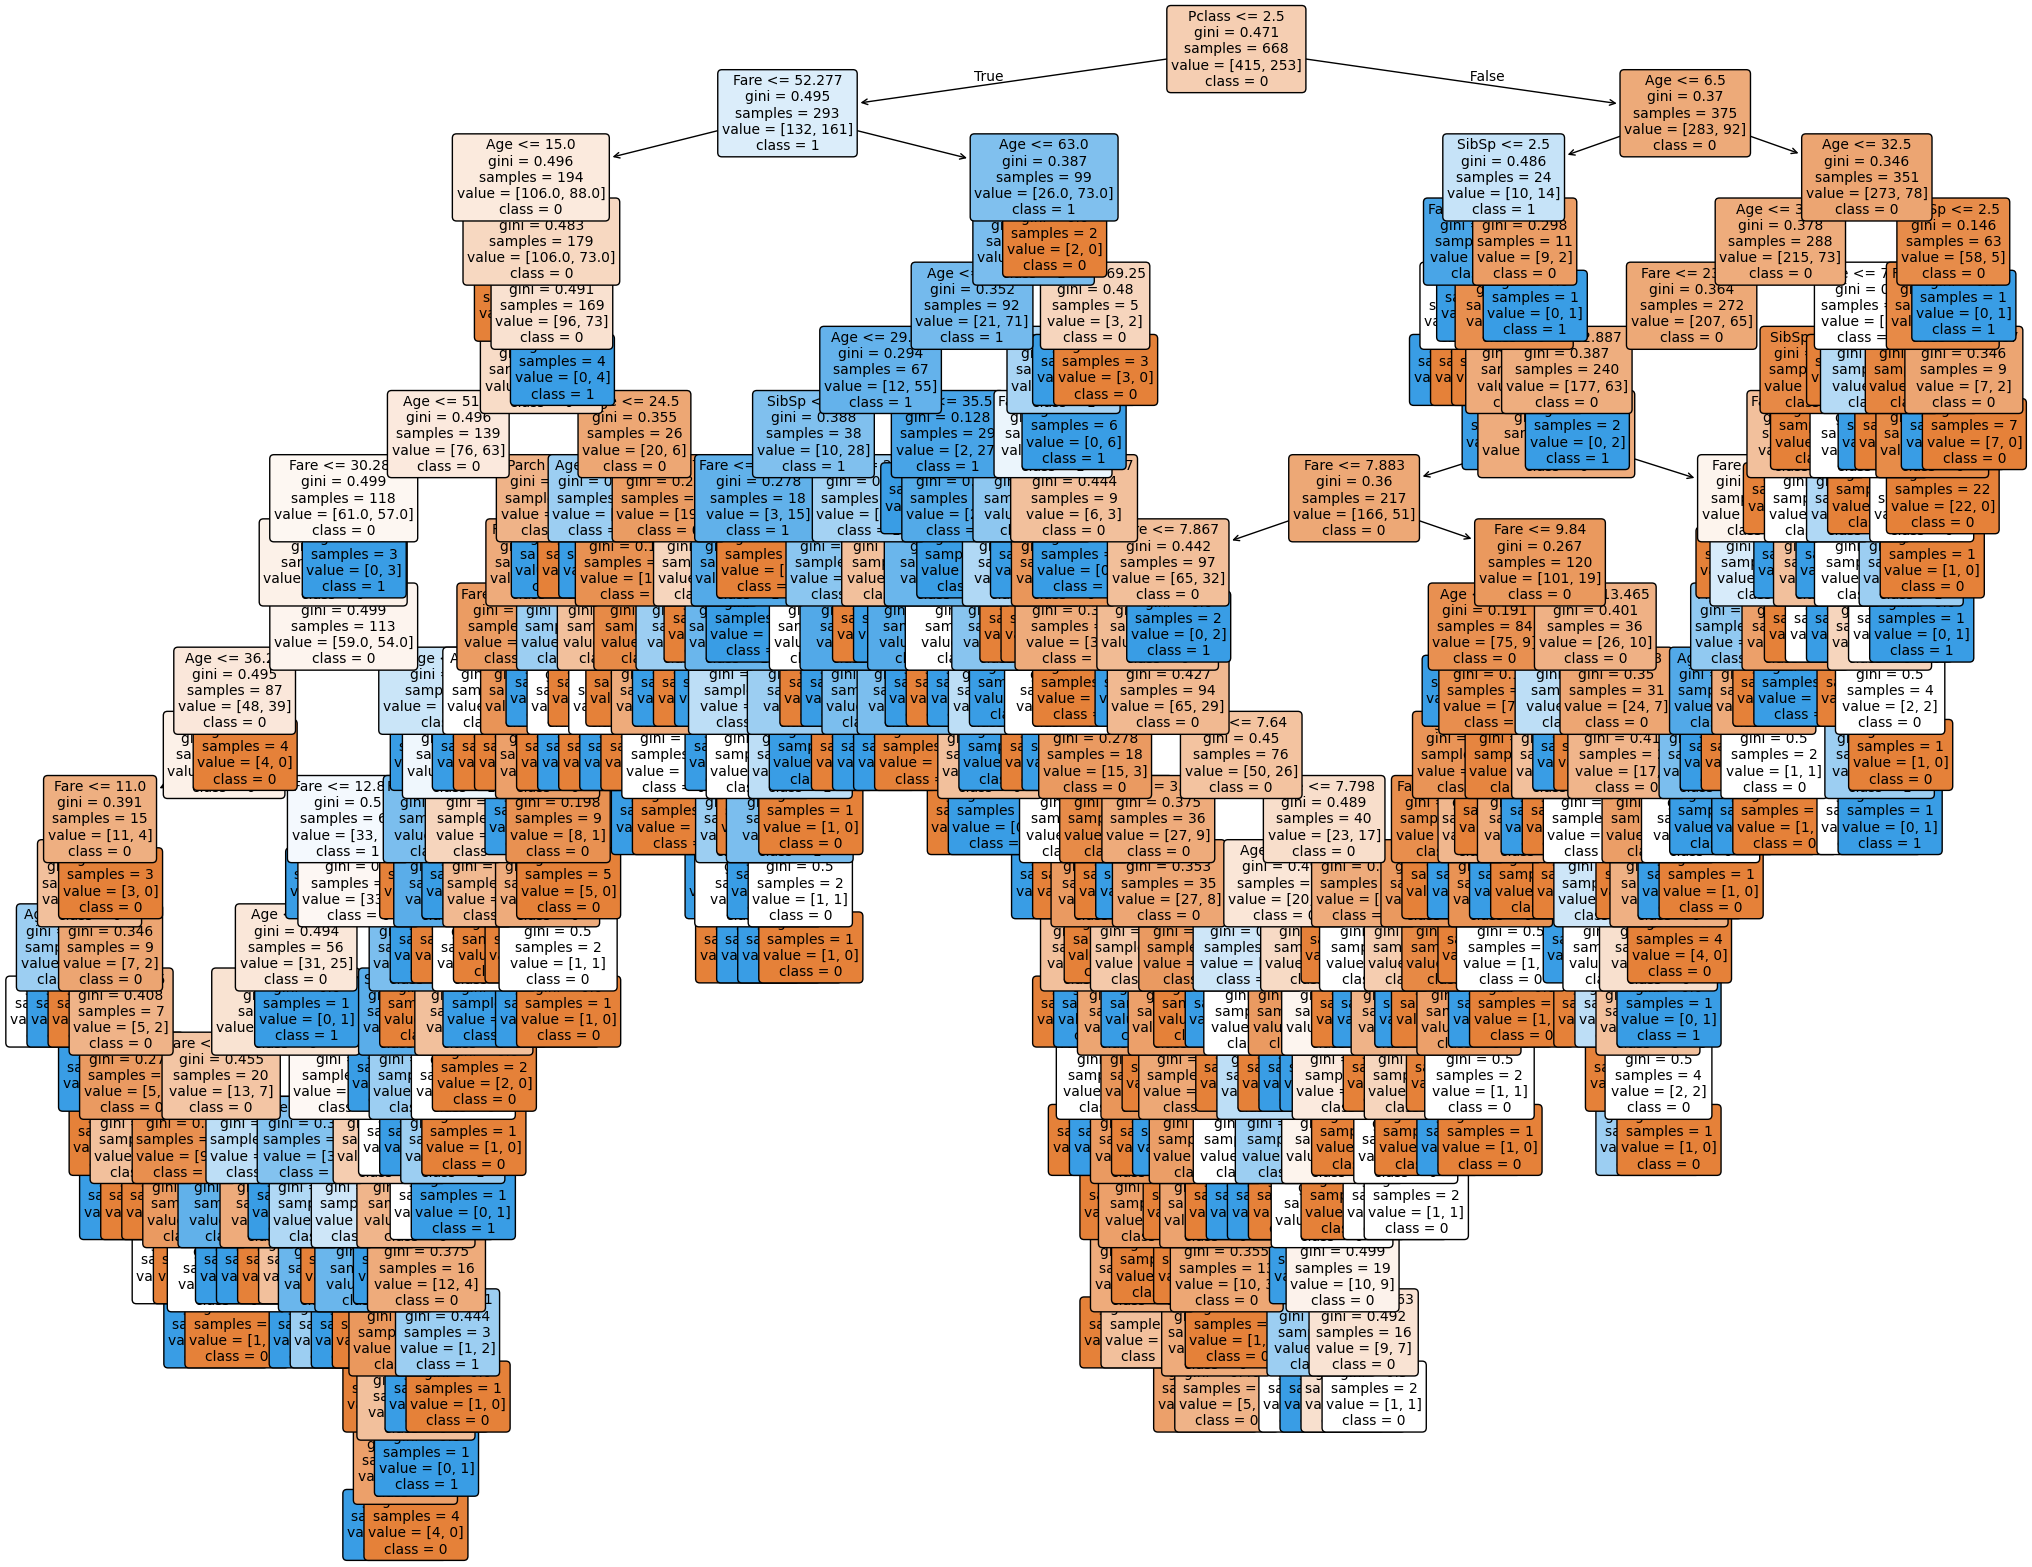

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Convert categorical 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Drop 'PassengerId' as it's an identifier and not a useful feature for the model
X = X.drop("PassengerId", axis=1)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Model accuracy
print("Accuracy:", dt.score(x_test, y_test))

# Feature names
f_name = list(X.columns)

# Class names
t_name = [str(c) for c in sorted(y.unique())]
print("Class names:", t_name)

# Plot the decision tree
plt.figure(figsize=(25, 20))
plot_tree(
    dt,
    feature_names=f_name,
    class_names=t_name,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()

SVM Accuracy: 0.6536312849162011


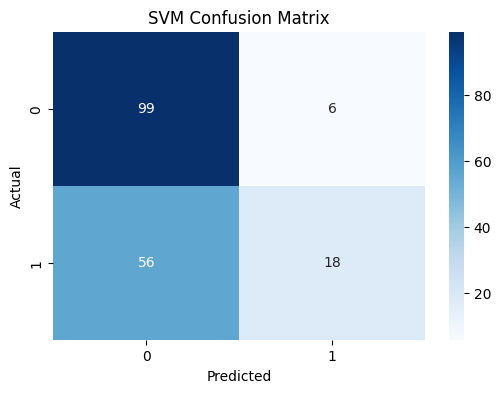

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Re-derive X and y from the current state of df
# This addresses the 'ValueError: Input X contains NaN' from SVC
# Ensure 'Sex' column is handled, as it currently contains NaNs based on kernel state.

# Define features (X) and target (y)
y = df['Survived']
X = df.drop('Survived', axis=1)

# Drop 'PassengerId' as it's an identifier and not a useful feature for the model
X = X.drop('PassengerId', axis=1)

# Drop 'Sex' column because it contains NaNs (likely due to previous re-mapping issues)
# and thus provides no useful information for the model in its current state.
X = X.drop('Sex', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# ------------------------ CONFUSION MATRIX PLOT ------------------------

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
